In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
from scipy.sparse.csgraph import minimum_spanning_tree
import math


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from modules.dp_bounds import dp_bounds

from modules.Bhattacharyya import Bhattacharyya_bounds


In [3]:
mean_sep = np.linspace(0, 3, 15 , endpoint = True)

mean_sep

array([0.        , 0.21428571, 0.42857143, 0.64285714, 0.85714286,
       1.07142857, 1.28571429, 1.5       , 1.71428571, 1.92857143,
       2.14285714, 2.35714286, 2.57142857, 2.78571429, 3.        ])

In [4]:
Bhattacharyya_l = []
Bhattacharyya_u = []
dp_lst = []

sample_size= 400
MC_num = 400
n0, n1 = sample_size, sample_size

for i in mean_sep:
    if (i*10)  % 1 == 0:
        print(i)
    else:
        print(i, end = " ")
    
    mean1 = [0, 0, 0 ]
    covariance1 = np.identity(3)

    mean2 = [i, 0, 0  ]

    covariance2= np.identity(3)
    
    mean1 = np.array(mean1)
    mean2 = np.array(mean2)
    params1  = [mean1, covariance1, n0]
    params2  = [mean2, covariance2, n1]
    
    a,b = Bhattacharyya_bounds(params1[:2], params2[:2])
    Bhattacharyya_l.append(a)
    Bhattacharyya_u.append(b)
    
    dp_class = dp_bounds('mv_normal', params1, params2, MC_num,handle_errors= True, suppress_message=True)
    dp_lst.append(dp_class)


0.0
0.21428571428571427 0.42857142857142855 0.6428571428571428 0.8571428571428571 1.0714285714285714 1.2857142857142856 1.5
1.7142857142857142 1.9285714285714284 2.142857142857143 2.357142857142857 2.571428571428571 2.7857142857142856 3.0


In [5]:
dp_l = []
dp_u = []
for obj in dp_lst:
    a,b = obj.get_bounds_stats()
    dp_l.append(a[2])
    dp_u.append(b[2])
    
    

In [48]:
dp_lst[0].get_bounds_stats()

[DescribeResult(nobs=206, minmax=(0.32860863498997384, 0.5), mean=0.42938442097718077, variance=0.0013000909260976851, skewness=-0.13072746438226868, kurtosis=-0.3820220018546743),
 DescribeResult(nobs=206, minmax=(0.44125, 0.5), mean=0.4874393203883495, variance=0.00012152069026758238, skewness=-1.2512948092057252, kurtosis=1.491909945640665)]

In [7]:
exact = []

for i in mean_sep:
    dx = 0.001
    x = np.arange(-5, 5 + dx, dx)

    f0 = np.exp(-0.5 * (x - 0)**2) / np.sqrt(2 * np.pi)
    f1 = np.exp(-0.5 * (x - i)**2) / np.sqrt(2 * np.pi)

    fmin = np.minimum(f0, f1)

    BER = 0.5 * np.sum(fmin * dx)
    
    exact.append(BER)

#     print("BER 2d:", BER)

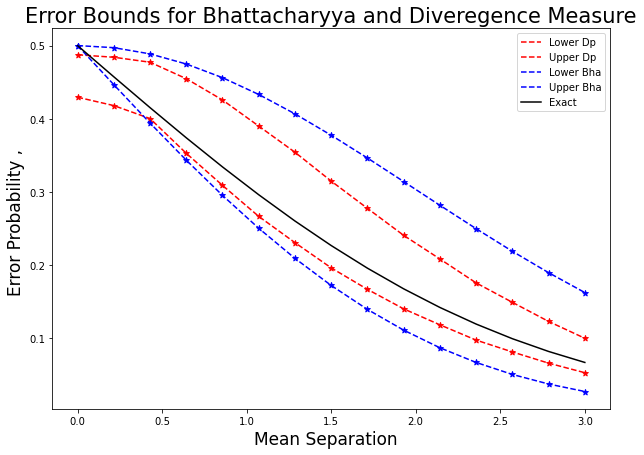

In [47]:
fs =17
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

# ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(mean_sep, dp_l, 'r--', label='Lower Dp')
ax.plot(mean_sep, dp_u, 'r--', label='Upper Dp')

ax.scatter(mean_sep, dp_l, color='r', marker='*')
ax.scatter(mean_sep, dp_u, color ='r', marker ='*' )

ax.plot(mean_sep, Bhattacharyya_l, 'b--', label='Lower Bha')
ax.plot(mean_sep, Bhattacharyya_u, 'b--', label='Upper Bha')

ax.plot(mean_sep, exact, 'k', label='Exact')

ax.scatter(mean_sep, Bhattacharyya_l, color='b', marker='*')
ax.scatter(mean_sep, Bhattacharyya_u, color ='b', marker ='*' )


ax.set_xlabel("Mean Separation  ", fontsize = fs)
ax.set_ylabel("Error Probability , ", fontsize=fs)
ax.set_title("Error Bounds for Bhattacharyya and Diveregence Measure", fontsize = fs +4)
ax.legend()
# plt.savefig("test.png",facecolor=(1,1,1,1))

plt.show()
